# Spectral Analysis of U and V

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import netcdf
from scipy import signal

In [2]:
fpath = '/gscratch/jisao/mclaret/GL64/'
gridU_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridU_k1.nc','r')
gridV_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridV_k1.nc','r')
gridU_k58 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridU_k58.nc','r')
gridV_k58 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridV_k58.nc','r')

In [3]:
# verify data shapes
if gridU_k1.variables['vozocrtx'].shape == gridV_k1.variables['vomecrty'].shape:
    print('k1 component shapes match.')
else:
    print('k1 component shapes do not match.')

if gridU_k58.variables['vozocrtx'].shape == gridV_k58.variables['vomecrty'].shape:
    print('k58 component shapes match.')
else:
    print('k58 component shapes do not match.')

k1 component shapes match.
k58 component shapes match.


In [4]:
# coordinates to focus on
#x=275; y=48; t0=0; t1=3648-1  # S1 eddy
x=321; y=100; t0=0; t1=3648-1  # S2 eddy
#x=347; y=54; t0=0; t1=3648-1  # S3 eddy

# variables at k=1
nav_lon = gridU_k1.variables['nav_lon'][y-1, x-1].copy()          # longitude
nav_lat = gridU_k1.variables['nav_lat'][y-1, x-1].copy()          # latitude
U_k1 = gridU_k1.variables['vozocrtx'][t0:t1, 0, y-1, x-1].copy()  # zonal velocities at time zero
V_k1 = gridV_k1.variables['vomecrty'][t0:t1, 0, y-1, x-1].copy()  # meridional velocities at time zero

# variables at k=58
U_k58 = gridU_k58.variables['vozocrtx'][t0:t1, 0, y-1, x-1].copy()  # zonal velocities at time zero
V_k58 = gridV_k58.variables['vomecrty'][t0:t1, 0, y-1, x-1].copy()  # meridional velocities at time zero

gridU_k1.close()
gridV_k1.close()
gridU_k58.close()
gridV_k58.close()

In [5]:
maxt = len(U_k1)
dt = 1.0  # 1-hour resolution
T = (maxt-1)*dt
times = np.arange(1,maxt+1,1) * 1.0
print('maxt = ', maxt)
print('times = ', times)

maxt =  3647
times =  [1.000e+00 2.000e+00 3.000e+00 ... 3.645e+03 3.646e+03 3.647e+03]


In [6]:
omega = 7.2921e-5
fCor = 2.*omega*np.sin((nav_lat)/180*np.pi)  # radians/sec
Tip = ((1./fCor) / 3600) * (2*np.pi)         # hours/cycle

print('fCor =', fCor)
print('Tip =', Tip)

fCor = 9.910805378047207e-05
Tip = 17.610367527348455


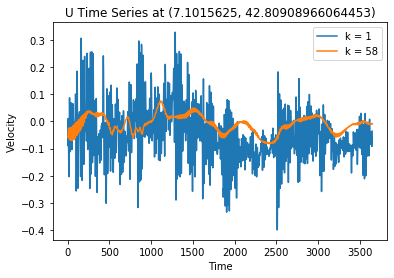

In [7]:
# plot time series of U
plt.figure()
plt.plot(times, U_k1, label='k = 1')
plt.plot(times, U_k58, label='k = 58')
#plt.xlim(0,400)

# plot labels
plt.title('U Time Series at ({}, {})'.format(nav_lon, nav_lat))
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()

In [8]:
# Tukey window
alpha=0.2
# Tapered cosine windows
win1 = signal.tukey(len(U_k1),0)     # rectangular window
win2 = signal.tukey(len(U_k1),1)     # Hann window
win3 = signal.tukey(len(U_k1),alpha) # 20% of points

In [9]:
# find amplitudes of Fourier coefficients
fc_U_k1 = np.fft.fft(U_k1*win3)                  # k1 Fourier coefficients (FCs) w/ window
amp_U_k1 = fc_U_k1.real**2 + fc_U_k1.imag**2     # amplitude of k1 FCs
fc_U_k58 = np.fft.fft(U_k58*win3)                # k58 FCs w/ window
amp_U_k58 = fc_U_k58.real**2 + fc_U_k58.imag**2  # amplitude of k58 FCs

fq_U = np.fft.fftfreq(times.shape[-1],dt)        # frequencies corresponding to each FC (cycles/h)
fq_U_norm = fq_U*2*np.pi/fCor/3600               # normalized to coriolis frequency
print('fq_U =', fq_U)
print('normalized =', fq_U_norm)

# rearrange data for plot
fq_U_norm = np.fft.fftshift(fq_U_norm)
amp_U_k1 = np.fft.fftshift(amp_U_k1)
amp_U_k58 = np.fft.fftshift(amp_U_k58)

fq_U = [ 0.          0.0002742   0.0005484  ... -0.00082259 -0.0005484
 -0.0002742 ]
normalized = [ 0.          0.00482873  0.00965745 ... -0.01448618 -0.00965745
 -0.00482873]


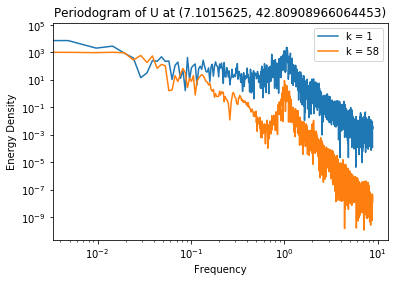

In [10]:
# plot periodogram of U
plt.figure(1)
plt.plot(fq_U_norm, amp_U_k1, label='k = 1')
plt.plot(fq_U_norm, amp_U_k58, label='k = 58')
#plt.xlim(-1,3)
#plt.ylim(0, 10000)

# plot labels
plt.title('Periodogram of U at ({}, {})'.format(nav_lon, nav_lat))
plt.xlabel('Frequency')
plt.ylabel('Energy Density')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

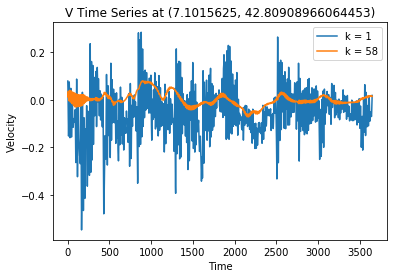

In [11]:
# plot time series of V
plt.figure()
plt.plot(times, V_k1, label='k = 1')
plt.plot(times, V_k58, label='k = 58')
#plt.xlim(0,400)

# plot labels
plt.title('V Time Series at ({}, {})'.format(nav_lon, nav_lat))
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()

In [12]:
# find amplitudes of Fourier coefficients
fc_V_k1 = np.fft.fft(V_k1*win3)                  # k1 Fourier coefficients (FCs)
amp_V_k1 = fc_V_k1.real**2 + fc_V_k1.imag**2     # amplitude of k1 FCs
fc_V_k58 = np.fft.fft(V_k58*win3)                # k58 FCs
amp_V_k58 = fc_V_k58.real**2 + fc_V_k58.imag**2  # amplitude of k58 FCs

fq_V = np.fft.fftfreq(times.shape[-1],dt)        # frequencies corresponding to each FC (cycles/h)
fq_V_norm = fq_V*2*np.pi/fCor/3600               # normalized to coriolis frequency
print('fq_V =', fq_V)
print('normalized =', fq_V_norm)

# rearrange data for plot
fq_V_norm = np.fft.fftshift(fq_V_norm)
amp_V_k1 = np.fft.fftshift(amp_V_k1)
amp_V_k58 = np.fft.fftshift(amp_V_k58)

fq_V = [ 0.          0.0002742   0.0005484  ... -0.00082259 -0.0005484
 -0.0002742 ]
normalized = [ 0.          0.00482873  0.00965745 ... -0.01448618 -0.00965745
 -0.00482873]


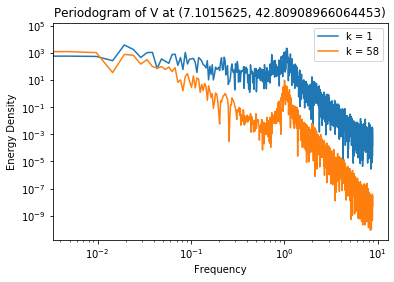

In [13]:
# plot periodogram of V
plt.figure(2)
plt.loglog(fq_V_norm, amp_V_k1, label='k = 1')
plt.loglog(fq_V_norm, amp_V_k58, label='k = 58')
#plt.xlim(0, 3)

# plot labels
plt.title('Periodogram of V at ({}, {})'.format(nav_lon, nav_lat))
plt.xlabel('Frequency')
plt.ylabel('Energy Density')
plt.legend()
plt.show()